In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from scipy.signal import find_peaks
from scipy import signal
import os

from pathlib import Path

import pickle

path_aurora_dataset = Path('/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/')


def reject_outliers(data):
    #return data[abs(data - np.mean(data)) < 0.3 * np.mean(data)]
    return data[abs(data - np.mean(data)) <3 * np.std(data)]



dictionary_path = "/Users/cslinxs/Desktop/all_weeks/summer24-lab/measurements_auscultatory_dictionary_ALL.pkl"

with open(dictionary_path, 'rb') as handle:
    all_auscultatory_dic = pickle.load(handle)


#https://www.youtube.com/watch?v=q_HS4s1L8UI

In [25]:
# for person in sorted(os.listdir(path_aurora_dataset/"measurements_auscultatory"))[:2]:
#     if "a" in person:
#         filler_to_person = basic_mesures_data[basic_mesures_data["pid"] == person]
#         print("hi")
#         for each_path in filler_to_person["waveform_file_path"]:
#             flatlined_data = get_even_split(path_aurora_dataset/each_path)
#             print(flatlined_data)

            
#             # here he made a copy of the data fram with everything shirted back 7 cuz 7 days
#             # i think I should skip using the averge distance
#             look_back = 7
#             shifted_df = prepare_data_frame_for_lstm(flatlined_data, )


            


In [26]:
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [86]:
path_aurora_dataset = Path('/Users/cslinxs/Desktop/aurora_dataset/aurora_dataset/')
auscultatory_data = path_aurora_dataset / "measurements_auscultatory.tsv"

participants_data =  path_aurora_dataset / "participants.tsv"
basic_mesures_data = pd.read_csv(auscultatory_data,sep = '\t').dropna(subset=["waveform_file_path"]).dropna(subset=["sbp"]).dropna(subset=["dbp"]) 

def get_even_split(path):
    #print(path)
    df = pd.read_csv(path,sep = '\t')   
    pos_pressure = df["pressure"]

    neglist = [ -x for x in pos_pressure]

    b, a = signal.butter(1, 0.002, analog=False)
    gustafsson_avg = signal.filtfilt(b, a, x= pos_pressure, method="gust")
    y_flater = [real_pre-abs( guston_avg) for real_pre, guston_avg in zip(pos_pressure, gustafsson_avg)]

    y_flater = np.array(y_flater)
    neglist = [ -x for x in y_flater]

    neg_max_values = max(neglist)
    neg_mix_values = min(neglist)
    mid_neg_value= neg_max_values - neg_mix_values

    min_height = neg_max_values - mid_neg_value*0.30 

    min_peaks, _ = find_peaks(neglist , height= min_height, width=80)


    most_accurate_mins = min_peaks
    diffrences_new_min = reject_outliers(np.diff(most_accurate_mins))
    diffrences_new_min
    plt.plot(y_flater)
    
    plt.show()
    return y_flater# (len(diffrences_new_min.mean()), pos_pressure)#len(diffrences_new_min.mean())
 

def prepare_data_frame_for_lstm(df,n_steps,pos_pressure ):
    df = df.pandas(df)
    for i in range(1, n_steps+1):
        df[f"shift \(t-{i})"] = pos_pressure.shift(i)


# everything[each_path] = [each_path_50_cords, filler_to_person[filler_to_person["waveform_file_path"] == each_path]["sbp"], 
#                          filler_to_person[filler_to_person["waveform_file_path"] == each_path]["dbp"] ]

        

In [87]:
def iterate_minibatches(inputs,targets, batchsize, shuffle= False):
    if shuffle:
        indices = np.arrange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs)-batchsize+1,batchsize):
        if shuffle:
            excerp = indices[start_idx: start_idx+batchsize]
        else:
            excerp = slice(start_idx, start_idx + batchsize)
            # indices[start_idx: start_idx+batchsize]
        yield inputs[excerp], targets[excerp]

class CNN1_Net(nn.Module):
    def __init__(self, kernel_size_1 =5,
                 stride_size=1, num_channels =1, depth_1 =1, depth_2 =5, 
                 kernel_size_2 =5, num_hidden =20, num_labels =5):
        super(CNN1_Net, self).__init__()

        self.classifer = nn.Sequential(
            nn.Conv1d(num_channels, depth_1, kernel_size=kernel_size_1)
        )

        self.fc1 = nn.Sequential(nn.Linear(depth_2*kernel_size_2,num_hidden),
                                 nn.ReLU(),
                                 nn.Dropout(0.5)
                                 )
        self.fc2 = nn.Sequential(nn.Linear(num_hidden, num_labels),
                                 nn.ReLU(),
                                 nn.Dropout(0.5)
                                 )

    def forward(self, x):
        x = self.classifer(x)
        print(x)
        return x

hi


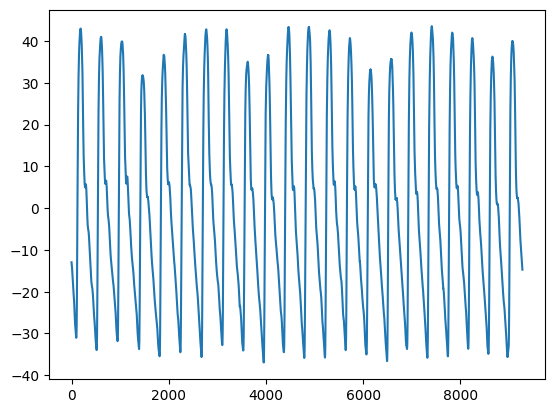

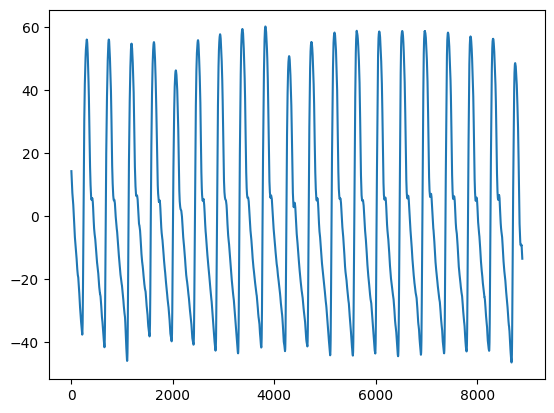

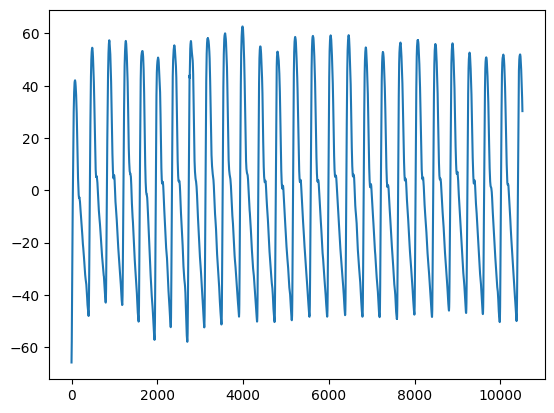

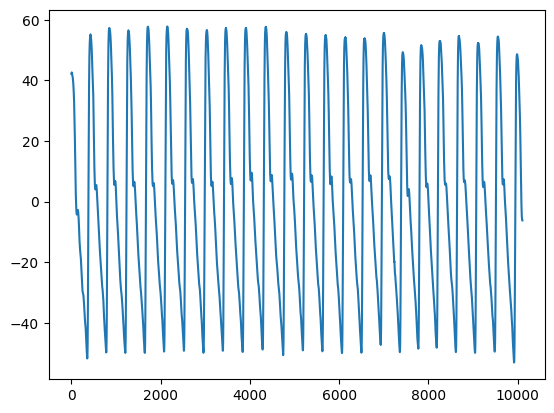

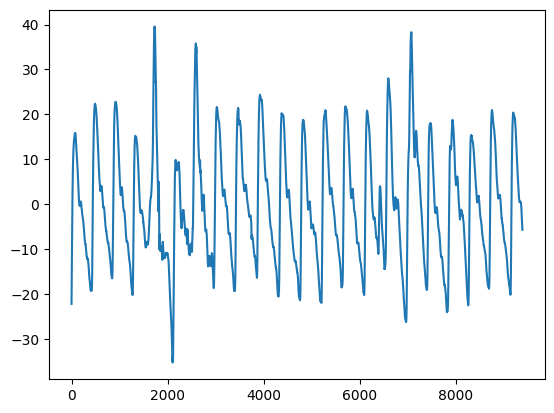

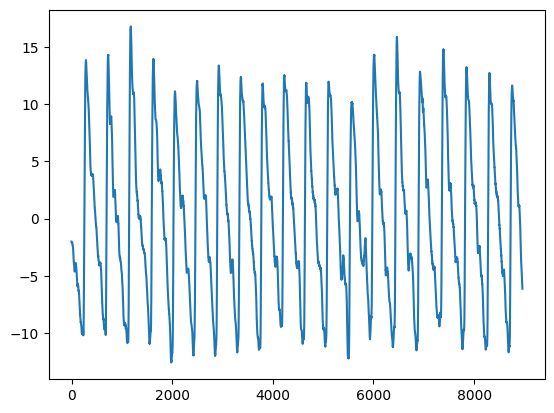

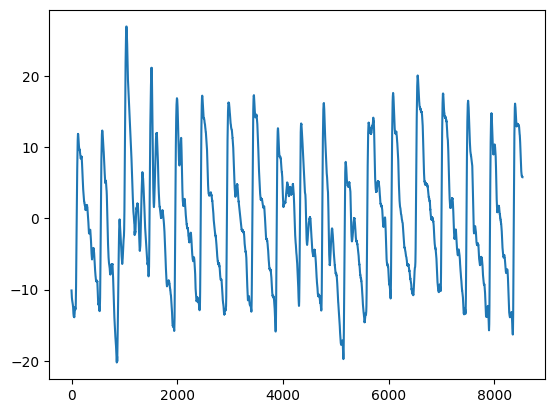

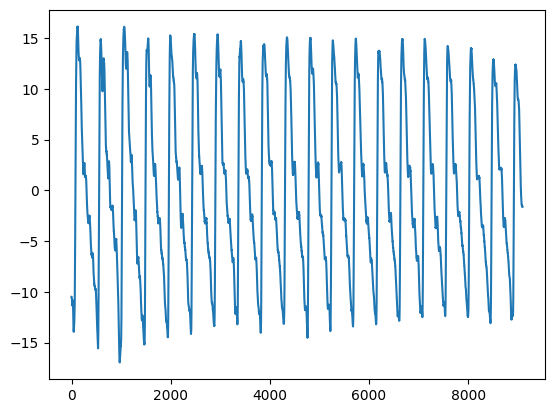

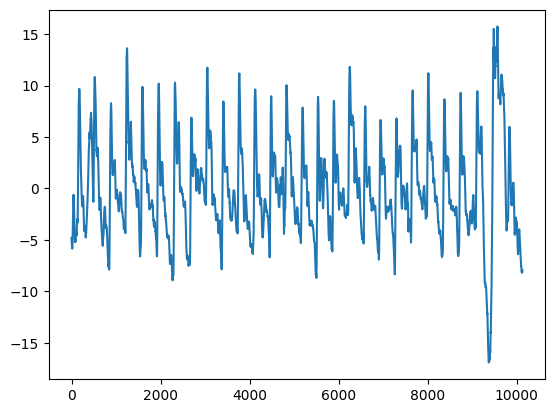

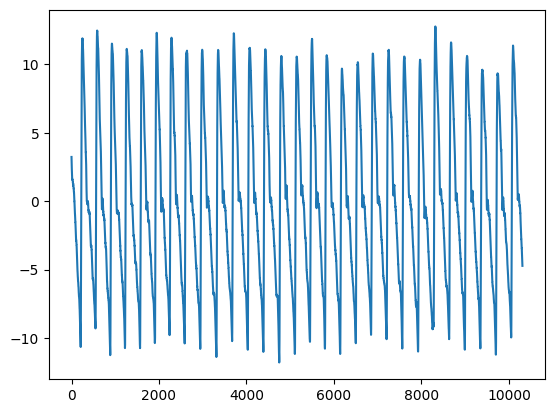

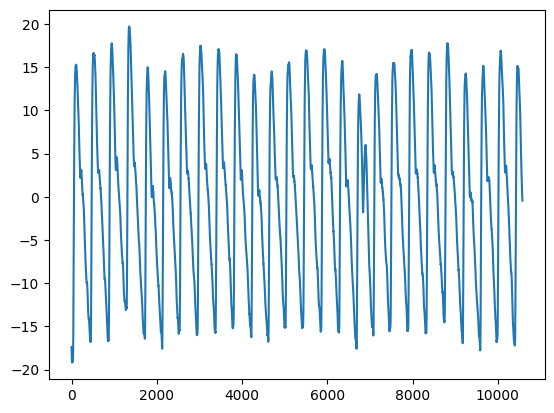

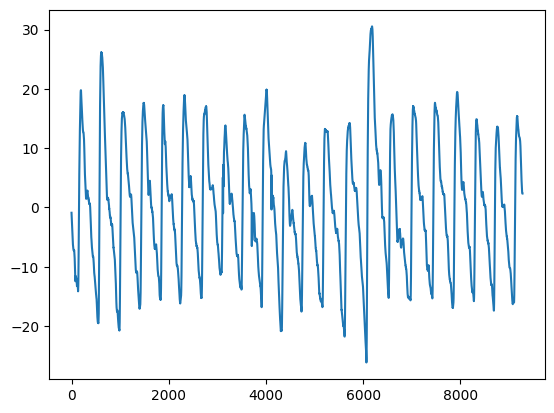

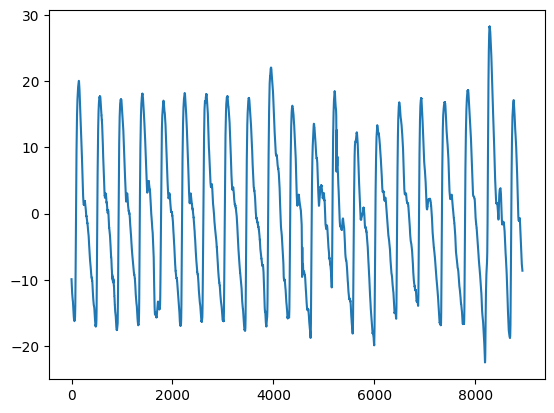

In [88]:
all_data_recordings = []

for person in sorted(os.listdir(path_aurora_dataset/"measurements_auscultatory"))[:2]:
    if "a" in person:
        filler_to_person = basic_mesures_data[basic_mesures_data["pid"] == person]
        print("hi")
        for each_path in filler_to_person["waveform_file_path"]:
            flatlined_data = get_even_split(path_aurora_dataset/each_path)
            all_data_recordings.append(flatlined_data)

In [82]:
X = len(all_data_recordings[0])
Y = all_data_recordings[0]

batch_size = 1
model = CNN1_Net()
optimzer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

model.train()

values = []

for epoch in range()

SyntaxError: invalid syntax (3574334799.py, line 13)

In [104]:
#https://www.youtube.com/watch?v=W58HaGKhjWg
net = nn.Conv1d(1,1,5, bias =False)
optimzer = optim.Adam(net.parameters(), lr=0.01)
running_loss = 0.0

X = list(range(len(all_data_recordings[0])))
Y = all_data_recordings[0]

print(len(X), len(Y))

X_tensor = torch.Tensor(X)#.reshape(1,1,-1)
print("Times", X_tensor)

Y_tensor = torch.Tensor(Y).reshape(1,1,-1)
print("Pressure", Y_tensor)


ts_tensor = torch.Tensor(X).reshape(1,1,-1)
kernel = [-40,40]
kernel_tensor = torch.tensor(kernel).reshape(1,1,-1)
#print("Kernel",  nn.Conv1d(ts_tensor,kernel_tensor))


for epoch in range(100):
    #print("start")
    optimzer.zero_grad()
    outputs = net(X_tensor)
    
    #print("hi",(outputs),(Y_tensor))

    #This is an iss
    print(len(outputs[0][0]), len(Y_tensor[0][0]))
    loss_value = torch.mean(outputs**2)
    loss_value.backward()

    optimzer.step()

    running_loss + loss_value.item()
    # if epoch %100 ==0:
    #     print(net.weight.data.numpy())

prediction = (net(X_tensor).data).float()
prediction =  prediction.numpy().flatten()
plt.title("Using 1d tensors")
plt.plot(prediction)
plt.plot(Y)


9275 9275
Times tensor([0.0000e+00, 1.0000e+00, 2.0000e+00,  ..., 9.2720e+03, 9.2730e+03,
        9.2740e+03])
Pressure tensor([[[-12.9618, -13.0623, -13.1634,  ..., -14.4329, -14.5317, -14.7311]]])


RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [9275]